# Logistic Regression : Microchip Testing

## Read in data, make X, y matrices

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
df=pd.read_csv("./data/ng_microchips.csv", header=None)
#df.head()
#df.describe()

In [22]:
X=df.iloc[:,:-1].values # all rows, all columns except last
y=df.iloc[:,-1].values  # all rows, last column

In [23]:
# print(y)
# print(X)

## Plot the original data

In [24]:
# not accepted
marker0_type  = "o" 
marker0_color = "yellow"
marker0_face  = "yellow"
marker0_edge  = "black"
marker0_size  = 18

# accepted 
marker1_type  = "+" 
marker1_color = "black"
marker1_face  = "black"
marker1_edge  = "black"
marker1_size  = 18

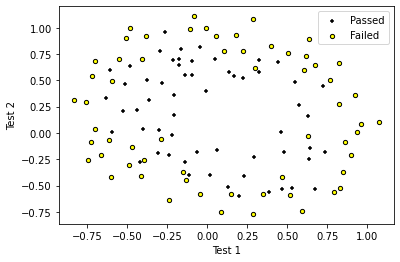

In [25]:
pos , neg = (y==1).reshape(118,1) , (y==0).reshape(118,1)
plt.scatter(X[pos[:,0],0],X[pos[:,0],1],
            c=marker1_color,
            marker=marker1_type,
            s=marker1_size,
            label="Passed")
plt.scatter(X[neg[:,0],0],X[neg[:,0],1],
            marker=marker0_type,
            color=marker0_color,
            facecolors=marker0_face,
            edgecolors=marker0_edge,
            s=marker0_size,
            label="Failed"
            )
plt.xlabel("Test 1")
plt.ylabel("Test 2")
plt.legend(loc="upper right")
#plt.legend(["Accepted","Rejected"],loc=0)

## Feature Mapping
combine a and b as new columns of matrix as:
$ 1 | a | b | a^2 | ab | b^2 | a^3 | a^2 b | a b^2 | b^3 |$  etc...

In [26]:
def mapFeature(x1,x2,degree):
    """
    take in numpy array of x1 and x2, return all polynomial terms up to the given degree
    """
    out = np.ones(len(x1)).reshape(len(x1),1) # reshape to make a column vector
    for i in range(1,degree+1):
        for j in range(i+1):
            terms= (x1**(i-j) * x2**j).reshape(len(x1),1)
            out= np.hstack((out,terms))
    return out

In [27]:
X = mapFeature(X[:,0], X[:,1],6) # convert X matrix 
print(X.shape)

(118, 28)


## Regularized Cost Function and Gradient

$m = $ number of training examples \
$n = $ number of parameters ($\exists$ a $\theta_0$)

$h_\theta(x) = g(\theta^T x)$ = hypothesis function (of x given $\theta$)\
$g(z) = \frac{1}{1+e^{-z}}$ = sigmoid function

$J(\theta) = \frac{1}{m}\sum_{i=1}^m \left[ -y^{(i)}\log\left(h_\theta (x^{(i)}) \right) - (1-y^{(i)})\log\left(1-h_\theta(x^{(i)})  \right) \right] + \frac{\lambda}{2m}\sum_{j=1}^n \theta_j^2$



$\frac{\partial J(\theta)}{\partial \theta_0} = \frac{1}{m}$

In [28]:
def sigmoid(z):
    """
    return the sigmoid of z
    """
    
    return 1/ (1 + np.exp(-z))

In [29]:
def costFunctionReg(theta, X, y ,Lambda):
    """
    Take in numpy array of theta, X, and y to return the regularize cost function and gradient
    of a logistic regression
    """
    
    m=len(y)
    y=y[:,np.newaxis]
    predictions = sigmoid(X @ theta)
    error = (-y * np.log(predictions)) - ((1-y)*np.log(1-predictions))
    cost = 1/m * sum(error)
    regCost= cost + Lambda/(2*m) * sum(theta**2)
    
    # compute gradient
    j_0= 1/m * (X.transpose() @ (predictions - y))[0]
    j_1 = 1/m * (X.transpose() @ (predictions - y))[1:] + (Lambda/m)* theta[1:]
    grad= np.vstack((j_0[:,np.newaxis],j_1))
    return regCost[0], grad

## Test Cost Function

In [30]:
# Initialize fitting parameters
initial_theta = np.zeros((X.shape[1], 1))

# Set regularization parameter lambda to 1
Lambda = 1

#Compute and display initial cost and gradient for regularized logistic regression
cost, grad=costFunctionReg(initial_theta, X, y, Lambda)
print(cost)
print(grad.shape)

0.6931471805599461
(28, 1)


## Do Gradient Descent to find best Theta Matrix

In [31]:
def gradientDescent(X,y,theta,alpha,num_iters,Lambda):
    """
    Take in numpy array X, y and theta and update theta by taking num_iters gradient steps
    with learning rate of alpha
    
    return theta and the list of the cost of theta during each iteration
    """
    
    m=len(y)
    J_history =[]
    
    for i in range(num_iters):
        cost, grad = costFunctionReg(theta,X,y,Lambda)
        theta = theta - (alpha * grad)
        J_history.append(cost)
    
    return theta , J_history

In [85]:
lambdas = [0, 0.5, 1, 5, 100]
thetas = []
J_histories = []
colors = ["red", "orange", "yellow", "green", "blue"]

for lam in lambdas:
    
 theta, J_history = gradientDescent(X,y,initial_theta,1,800,lam)
 thetas.append(theta)
 J_histories.append(J_history)

#print(thetas)
#print(J_histories)


#theta , J_history = gradientDescent(X,y,initial_theta,1,800,100)
##print(theta)
#print(theta.shape)

## Plot Cost Function 

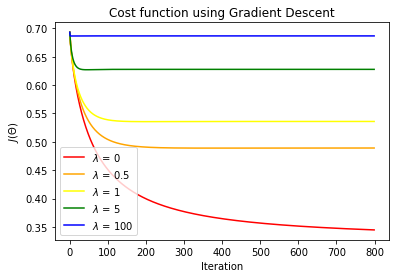

In [86]:
for jh,lam, col in zip(J_histories, lambdas, colors):
 plt.plot(jh,label=r"$\lambda$ = {}".format(lam), c=col)
 #plt.plot(J_histories[0])
 plt.xlabel("Iteration")
 plt.ylabel("$J(\Theta)$")
 plt.title("Cost function using Gradient Descent")
plt.legend(loc="lower left")

## Plot Decision Boundary

In [58]:
def mapFeaturePlot(x1,x2,degree):
    """
    take in numpy array of x1 and x2, return all polynomial terms up to the given degree
    don't save it as an ndarray 
    """
    out = np.ones(1)
    for i in range(1,degree+1):
        for j in range(i+1):
            terms= (x1**(i-j) * x2**j)
            out= np.hstack((out,terms))
    return out

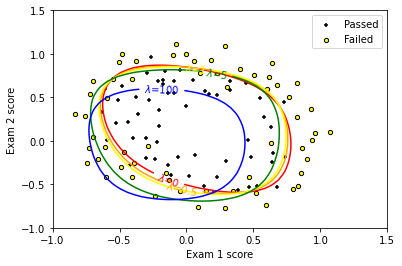

In [104]:
fig1, ax1 = plt.subplots()

plt.scatter(X[pos[:,0],1],X[pos[:,0],2],
            c=marker1_color,
            marker=marker1_type,
            s=marker1_size,
            label="Passed")
plt.scatter(X[neg[:,0],1],X[neg[:,0],2],
            marker=marker0_type,
            color=marker0_color,
            facecolors=marker0_face,
            edgecolors=marker0_edge,
            s=marker0_size,
            label="Failed"
            )
# Plotting decision boundary

u_vals = np.linspace(-1,1.5,50)
v_vals= np.linspace(-1,1.5,50)
z=np.zeros((len(u_vals),len(v_vals)))

for lam,thet,col in zip(lambdas,thetas,colors):

 for i in range(len(u_vals)):
     for j in range(len(v_vals)):
         z[i,j] =mapFeaturePlot(u_vals[i],v_vals[j],6) @ thet
 
 CS = ax1.contour(u_vals,v_vals,z.T,0,colors=col)
 ax1.clabel(CS, inline=True, fmt="$\lambda$={}".format(lam), fontsize=10)

plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(loc=0)

## Model Accuracy

In [41]:
def classifierPredict(theta,X):
    """
    take in numpy array of theta and X and predict the class 
    """
    predictions = X.dot(theta)
    
    return predictions>0

In [42]:
p=classifierPredict(theta,X)
print("Training Accuracy:", (sum(p==y[:,np.newaxis])/len(y) *100)[0],"%")

Training Accuracy: 83.05084745762711 %


## Convert to real python script

In [43]:
!jupyter nbconvert --to script logisticRegression_microchips.ipynb

[NbConvertApp] Converting notebook logisticRegression_microchips.ipynb to script
[NbConvertApp] Writing 6104 bytes to logisticRegression_microchips.py
